In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfin
yfin.pdr_override()
from pandas_datareader import data as pdr

In [2]:
start = '2010-01-01'
end = '2023-08-20'

df = pdr.get_data_yahoo('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [3]:
df =  df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [4]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


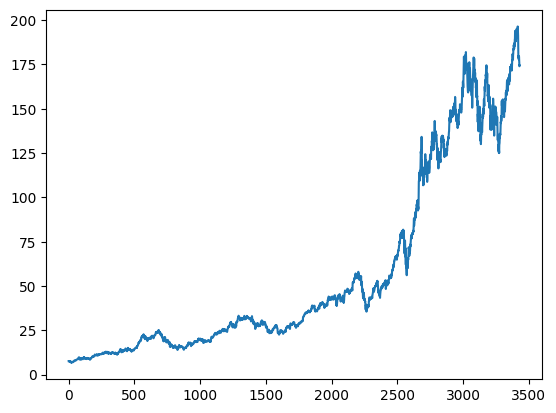

In [5]:
plt.plot(df['Close'])

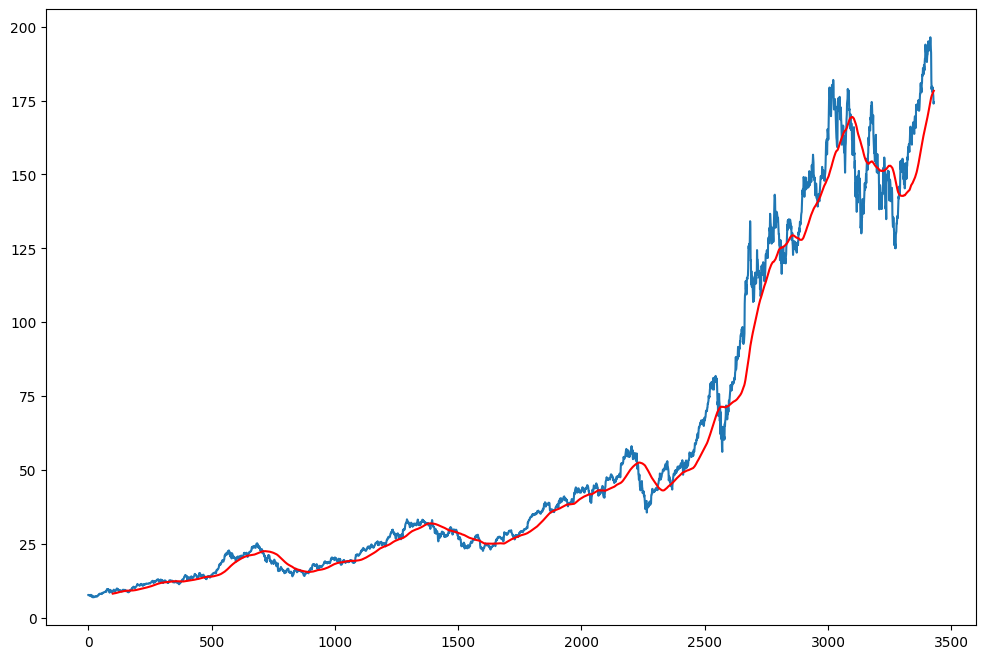

In [6]:
ma100 = df['Close'].rolling(100).mean()
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.plot(ma100, 'r')

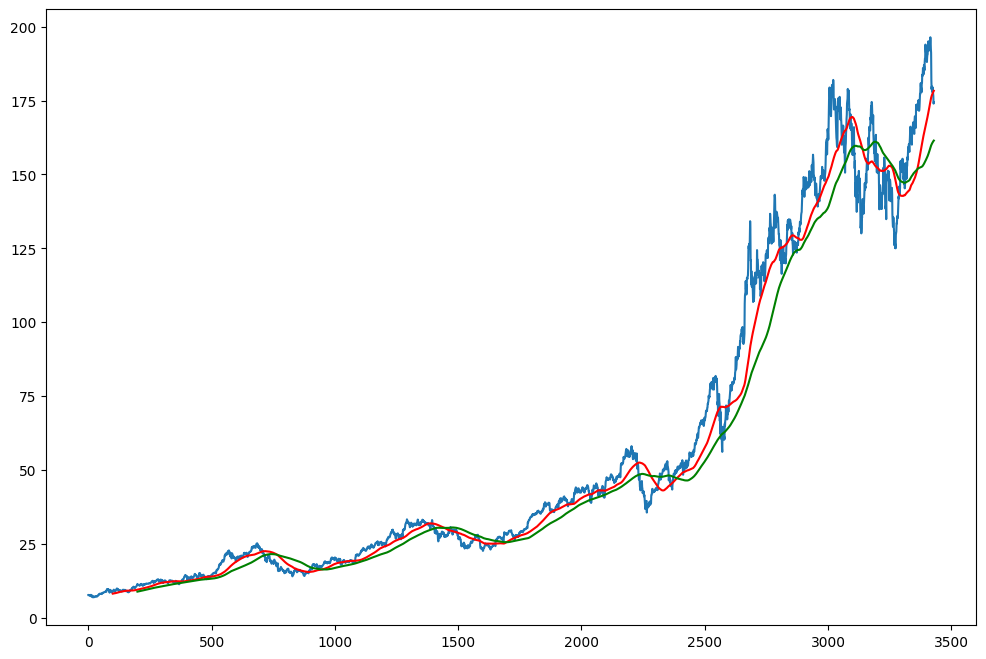

In [7]:
ma200 = df['Close'].rolling(200).mean()
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [8]:
df.shape

(3430, 5)

In [9]:
train_data = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
test_data = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

In [10]:
train_data.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [11]:
test_data.head()

,Close
2401,50.647499
2402,51.805000
2403,52.209999
2404,52.167500
2405,51.755001


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
train_data_array = scaler.fit_transform(train_data)
train_data_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.86527181],
       [0.85965206],
       [0.87094048]])

In [13]:
x_train = []
y_train = []

for i in range(100,train_data_array.shape[0]):
    x_train.append(train_data_array[i-100: i])
    y_train.append(train_data_array[i,0])

x_train , y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train.shape

(2301, 100, 1)

In [15]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2023-08-24 15:04:32.268348: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 15:04:32.625288: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 15:04:35.047676: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 15:04:35.070777: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 15:04:41.494173: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [16]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 


 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               96480     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 178761 (698.29 KB)
Trainable params: 178761 (698.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
72/72 [==============================] - 55s 593ms/step - loss: 0.0332
Epoch 2/50
72/72 [==============================] - 43s 592ms/step - loss: 0.0071
Epoch 3/50
72/72 [==============================] - 44s 605ms/step - loss: 0.0061
Epoch 4/50
72/72 [==============================] - 43s 600ms/step - loss: 0.0055
Epoch 5/50
72/72 [==============================] - 43s 592ms/step - loss: 0.0053
Epoch 6/50
72/72 [==============================] - 42s 585ms/step - loss: 0.0048
Epoch 7/50
72/72 [==============================] - 42s 581ms/step - loss: 0.0054
Epoch 8/50
72/72 [==============================] - 42s 587ms/step - loss: 0.0045
Epoch 9/50
72/72 [==============================] - 41s 572ms/step - loss: 0.0046
Epoch 10/50
72/72 [==============================] - 38s 533ms/step - loss: 0.0042
Epoch 11/50
72/72 [==============================] - 38s 527ms/step - loss: 0.0040
Epoch 12/50
72/72 [==============================] - 38s 533ms/step - loss: 0.0037
Epoch 13/50
7

In [19]:
model.save('stock_closingPrice_predictor.h5')

/home/archit/anaconda3/envs/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
past_100_days = train_data.tail(100)
past_100_days.head()

,Close
2301,43.582500
2302,43.717499
2303,43.287498
2304,43.742500
2305,43.962502


In [21]:
from pandas import concat
final_df = concat([past_100_days,test_data], ignore_index=True)

In [22]:
final_df.head()

,Close
0,43.582500
1,43.717499
2,43.287498
3,43.742500
4,43.962502


In [23]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(1129, 1)

In [24]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [25]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1029, 100, 1)
(1029,)


In [26]:
y_predicted = model.predict(x_test)
y_predicted.shape

33/33 [==============================] - 8s 206ms/step


(1029, 1)

In [27]:
scaler.scale_

array([0.00652209])

In [30]:
scale_factor = 1/0.00652209
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

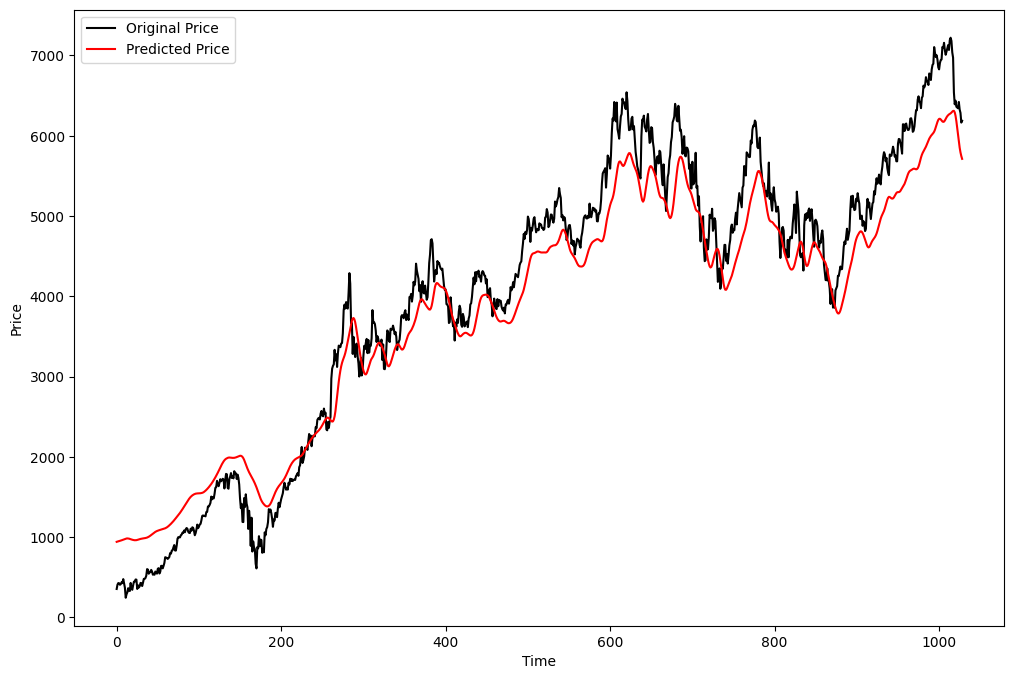

In [31]:
plt.figure(figsize=(12,8))
plt.plot(y_test, 'black', label='Original Price')
plt.plot(y_predicted, 'red', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

In [61]:
def calculate_rsi(price_data, period=14):
    delta = np.diff(price_data)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    avg_gain = np.convolve(gain, np.ones(period)/period, mode='valid')
    avg_loss = np.convolve(loss, np.ones(period)/period, mode='valid')

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return np.concatenate((np.full(period-1, np.nan), rsi))

rsi_period = 100
rsi_original = calculate_rsi(y_test, rsi_period)


In [62]:
y_predicted = y_predicted.ravel()

In [63]:
rsi_predicted = calculate_rsi(y_predicted, rsi_period)

/tmp/ipykernel_5496/1841821178.py:9: RuntimeWarning: divide by zero encountered in divide
  rs = avg_gain / avg_loss


<function matplotlib.pyplot.show(close=None, block=None)>

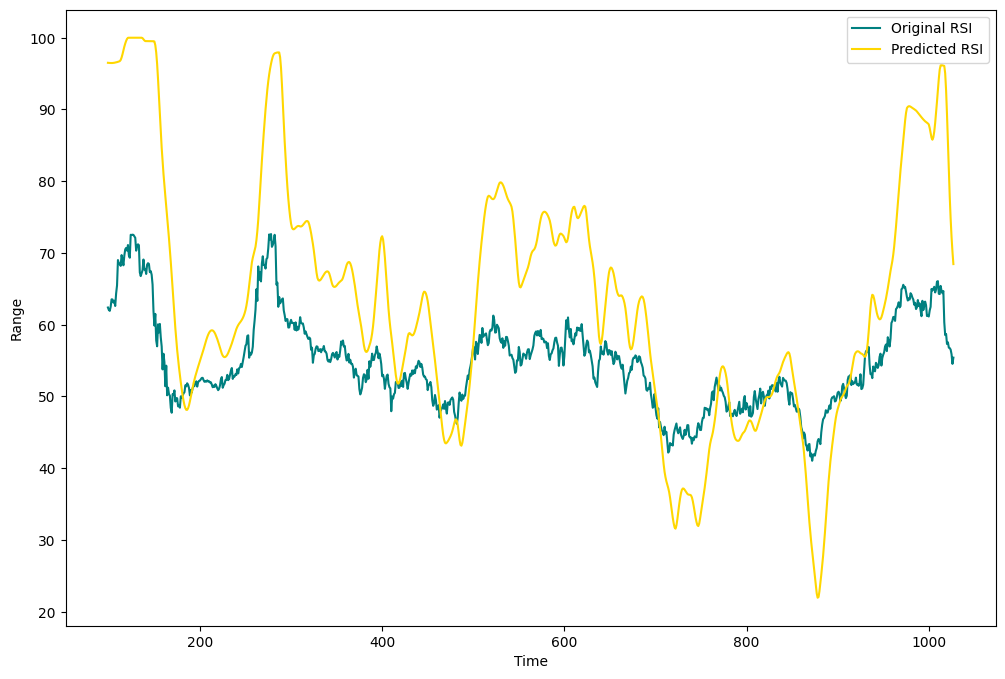

In [66]:
plt.figure(figsize=(12,8))
plt.plot(rsi_original, 'teal', label='Original RSI')
plt.plot(rsi_predicted, 'gold', label="Predicted RSI")
plt.xlabel('Time')
plt.ylabel('Range')
plt.legend()
plt.show